# Divyansh Tiwari
### DSBA intern TSF

# *Prediction using Decision Tree Classifier*

### The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## 1) Importing libraries

In [2]:
import pandas as pd
import numpy as np

## 2) Reading Dataset

In [6]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df.head()

Saving iris.csv to iris (1).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.size

900

## 3) Cleaning Data

In [8]:
df.drop('Id',inplace=True,axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Species'] = encoder.fit_transform(df['Species'])

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
x = df.iloc[:,0:4]
y = df['Species']
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Let's do the fun part now  ;-)

## Training the Classification model

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_cross,y_train,y_cross = train_test_split(x,y,test_size = 0.2,shuffle = True)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
model = DecisionTreeClassifier(max_depth=5)

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
score= model.score(x_cross,y_cross)
score

0.9666666666666667

## Here we are getting 93.33% accuracy on unseen data. isn't it pretty good..

## Now comes the Visualizaation part :

In [19]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.


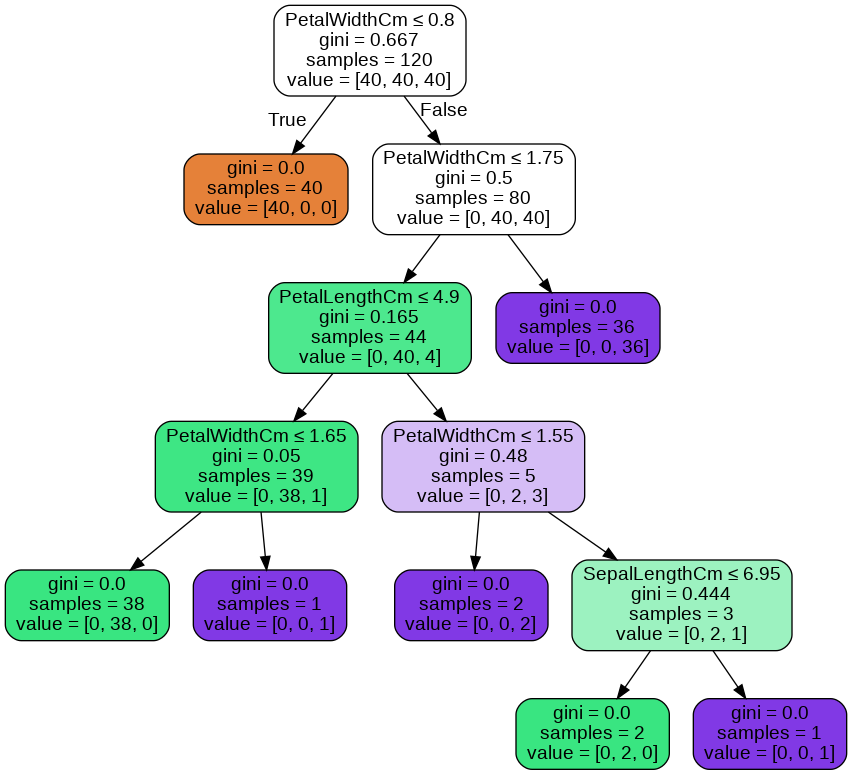

In [26]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,feature_names=['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# *It completes this task of Decision Tree Visualization. for this i would love to thanks The Sparks foundation for giving me this Opportunity*